# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    
    return image


def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
        
    plt.show()

    
def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [9]:
from utils import get_train_input

In [10]:
train_dataset = get_train_input("pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', 'data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', 'data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', 'data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', 'data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', 'data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', 'data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', 'data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', 'data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', 'data/train/segment-1051897962568538022_238_170_258_170_with_camera_labels.tfrecord', 'data/train/segment-10940952441434390507_1888_710_1908_710_with_camera

INFO:tensorflow:Number of filenames to read: 86


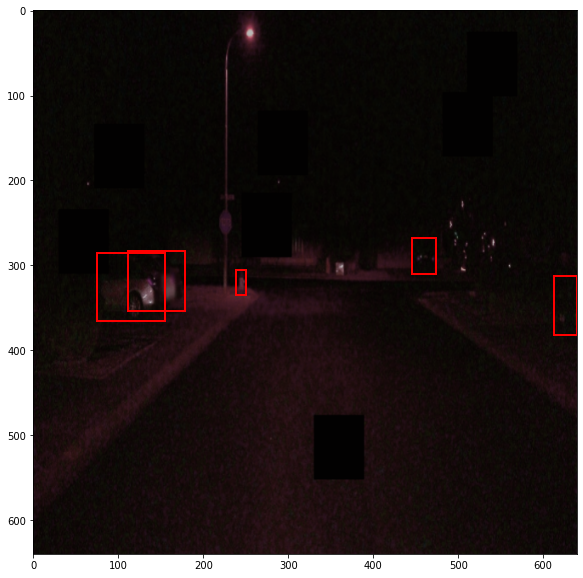

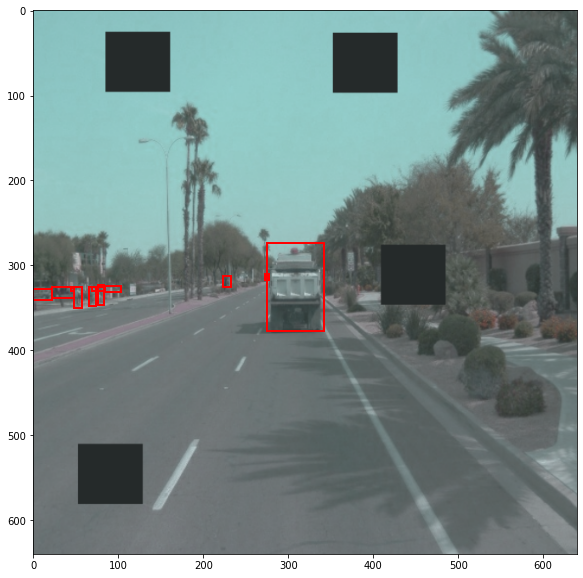

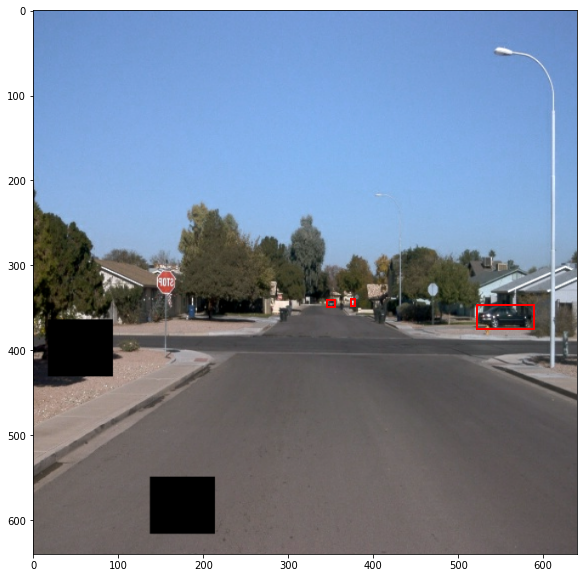

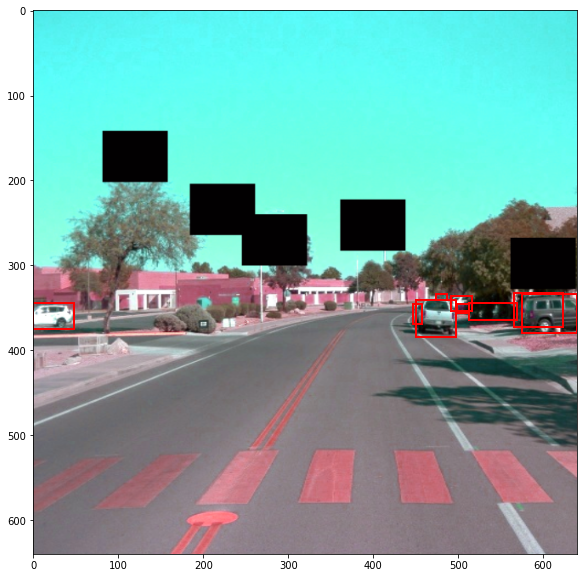

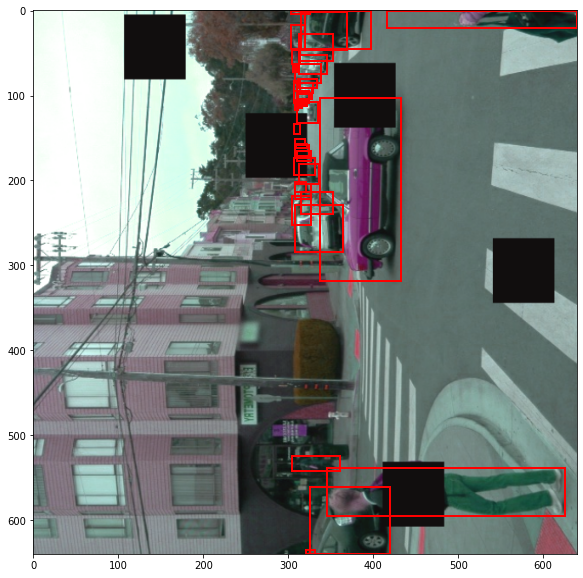

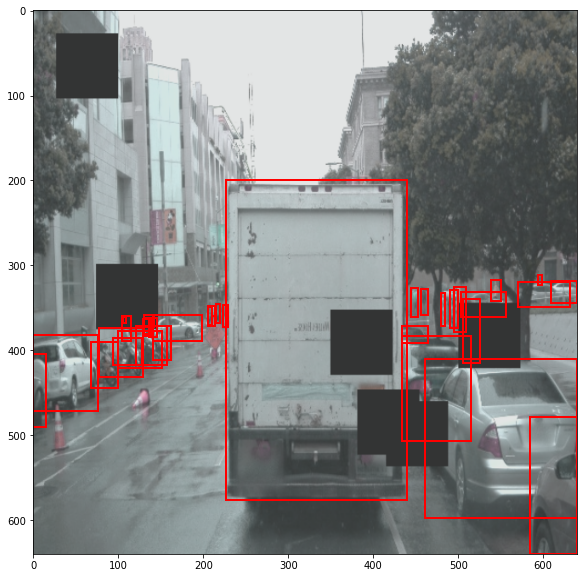

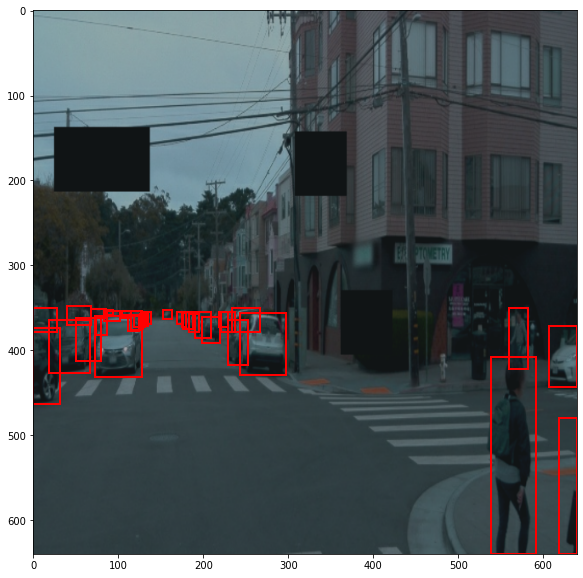

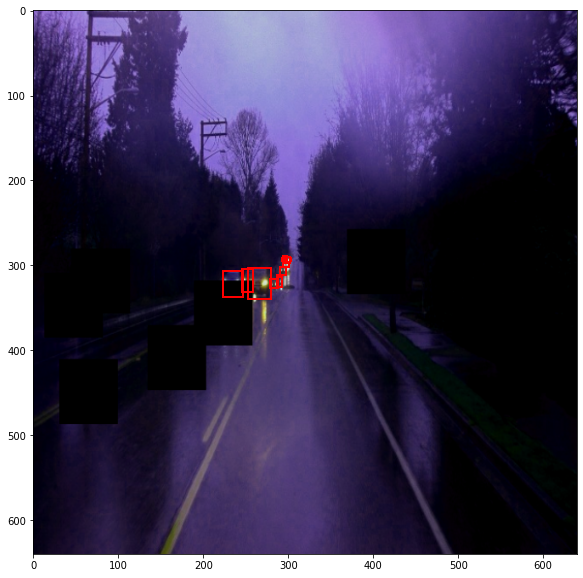

In [11]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

### RGB histogram display

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

use = ['r','g','b']
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
red = []
green = []
blue = []

for batch in train_dataset.take(5):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    
    for idx in range(batch_size):
        #print("idx: ", idx)
        width = batched_images[idx, ...].shape[0]
        height = batched_images[idx, ...].shape[0]

        img = batched_images[idx, ...]
        R, G, B = img[..., 0], img[..., 1], img[..., 2]
        red.extend(R.flatten().tolist())
        green.extend(G.flatten().tolist())
        blue.extend(B.flatten().tolist())

ax_r = sns.kdeplot(red, color='r', ax=ax, label='Red')
ax_r.legend(loc="upper right")

ax_g = sns.kdeplot(green, color='g', ax=ax, label='Green')
ax_g.legend(loc="upper right")

ax_b = sns.kdeplot(blue, color='b',ax=ax, label='Blue')
ax_b.legend(loc="upper right")

plt.title('RGB channel histogram')
plt.xlabel('Intensity[0 ~ 255]')